In [ ]:
#import
import numpy as np
np.random.seed(1337)
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Bidirectional

import math
%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'
from google.colab import files
uploaded = files.upload()



Using TensorFlow backend.


Saving FPT.csv to FPT.csv


In [ ]:
# Load và đọc data
df = pd.read_csv("FPT.csv")
df.head()

,DATE,CLOSING PRICE,TICKER,OPEN,HIGH,LOW,VOLUME
0,12/6/2020,47000,FPT,45000,47000,45000,3145450
1,11/6/2020,46000,FPT,48800,48800,46000,4278060
2,10/6/2020,48800,FPT,49000,49000,48400,1307540
3,9/6/2020,48950,FPT,49600,49650,48900,1491540
4,8/6/2020,49350,FPT,49000,50000,49000,4113250


In [ ]:
#Nhất quán định dạng data và kiểm tra null
df["CLOSING PRICE"] = pd.to_numeric(df["CLOSING PRICE"])
df["HIGH"] = pd.to_numeric(df["HIGH"])
df["LOW"] = pd.to_numeric(df["LOW"])
df["DATE"] = df["DATE"].values[::-1]
df["CLOSING PRICE"] = df["CLOSING PRICE"].values[::-1]
df["OPEN"] = df["OPEN"].values[::-1]
df["HIGH"] = df["HIGH"].values[::-1]
df["LOW"] = df["LOW"].values[::-1]
df["VOLUME"] = df["VOLUME"].values[::-1]
df.head()

,DATE,CLOSING PRICE,TICKER,OPEN,HIGH,LOW,VOLUME
0,12/6/2015,45100,FPT,44900,45300,44900,753350
1,15/06/2015,45000,FPT,45400,45400,44800,341650
2,16/06/2015,44500,FPT,45000,45200,44500,479370
3,17/06/2015,44400,FPT,44400,44600,44300,483360
4,18/06/2015,44500,FPT,44400,45000,44400,324300


In [ ]:
#Chia training set và data set

data = df.filter(['CLOSING PRICE'] + ['VOLUME'] +['OPEN'] +['HIGH'] +['LOW'])
dataset = data.values
a = df.filter(['CLOSING PRICE'])
training_data_len = math.ceil(len(dataset ) * .8)

kq = a.values
training_data_len
test_len =len(dataset) -  training_data_len
kq.size

1252

In [ ]:
#Scale data
scaler = MinMaxScaler(feature_range =(0,1))
scaler2 = MinMaxScaler(feature_range =(0,1))
scaled_kq = scaler2.fit_transform(kq)
scaled_data = scaler.fit_transform(dataset)
scaled_data



array([[0.24609375, 0.09792138, 0.24045802, 0.21856867, 0.256     ],
       [0.2421875 , 0.03704306, 0.25954198, 0.22243714, 0.252     ],
       [0.22265625, 0.0574078 , 0.24427481, 0.21470019, 0.24      ],
       ...,
       [0.390625  , 0.17986979, 0.39694656, 0.36170213, 0.396     ],
       [0.28125   , 0.61912233, 0.38931298, 0.35396518, 0.3       ],
       [0.3203125 , 0.45164262, 0.24427481, 0.28433269, 0.26      ]])

In [ ]:
# Chia training set theo x và y
train_data = scaled_data[0:training_data_len,:]
x_train = []
y_train = []
for i in range(60, len(train_data) - 3):
    x_train.append(train_data[i-60:i, :])
    y_train.append(scaled_kq[i + 3, 0])


In [ ]:
scaled_kq

array([[0.24609375],
       [0.2421875 ],
       [0.22265625],
       ...,
       [0.390625  ],
       [0.28125   ],
       [0.3203125 ]])

In [ ]:
#Chuyển sang mảng numpy
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape du lieu de co the su dung vao model LSTM cua python
temp = x_train
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 5))
temp.shape

(939, 60, 5)

In [ ]:
#xay dung LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences = True, input_shape = (60,5)))
model.add(LSTM(50,return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#Su dung model
model.compile(optimizer ='adam', loss = 'mean_squared_error')

In [ ]:
#Bat dau huan luyen
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
939/939 [==============================] - 37s 39ms/step - loss: 0.0101
Epoch 2/5
939/939 [==============================] - 35s 38ms/step - loss: 0.0073
Epoch 3/5
939/939 [==============================] - 36s 38ms/step - loss: 0.0067
Epoch 4/5
939/939 [==============================] - 36s 38ms/step - loss: 0.0063
Epoch 5/5
939/939 [==============================] - 38s 40ms/step - loss: 0.0059


In [ ]:
#Tao test set
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = kq[training_data_len + 3:,:]
for i in range(60, len(test_data) - 3):
    x_test.append(test_data[i-60:i, :])

In [ ]:
#Chuyen sang 3d array de su dung voi LSTM
x_test = np.array(x_test)
x_test.shape


(247, 60, 5)

In [ ]:
#Tao hypothesis
predictions = model.predict(x_test)
predictions2 = model.predict(x_train)
predictions = scaler2.inverse_transform(predictions)
predictions2 = scaler2.inverse_transform(predictions2)
predictions


array([[44474.902],
       [44185.535],
       [44085.902],
       [44309.71 ],
       [44898.707],
       [45170.582],
       [45071.055],
       [45826.875],
       [45986.22 ],
       [45609.31 ],
       [45560.723],
       [46494.793],
       [46858.69 ],
       [46678.723],
       [46785.66 ],
       [46561.332],
       [46342.516],
       [46373.285],
       [46800.582],
       [46794.824],
       [46859.727],
       [46962.535],
       [47138.074],
       [47015.203],
       [46759.586],
       [47631.727],
       [48100.25 ],
       [48286.81 ],
       [48659.367],
       [48416.566],
       [48341.273],
       [48288.203],
       [48043.39 ],
       [47946.74 ],
       [48152.03 ],
       [48384.34 ],
       [49019.508],
       [48676.69 ],
       [49146.84 ],
       [49912.434],
       [50424.52 ],
       [51307.26 ],
       [51884.4  ],
       [52510.26 ],
       [51951.812],
       [52810.79 ],
       [51961.28 ],
       [53141.527],
       [53494.246],
       [53091.383],


In [ ]:
#Tinh cost function
rmse =  np.sqrt(np.mean((predictions - y_test)**2))

rmse



2082.2400126885154

In [ ]:
mape = (np.mean(np.abs((y_test - predictions) / y_test))) * 100
mape

3.0517811169669695

999
      CLOSING PRICE   Predictions
1005          45400  44474.902344
1006          45400  44185.535156
1007          45150  44085.902344
1008          46500  44309.710938
1009          46150  44898.707031
...             ...           ...
1247          49350  48364.441406
1248          48950  48624.582031
1249          48800  48631.027344
1250          46000  48546.968750
1251          47000  49623.082031

[247 rows x 2 columns]


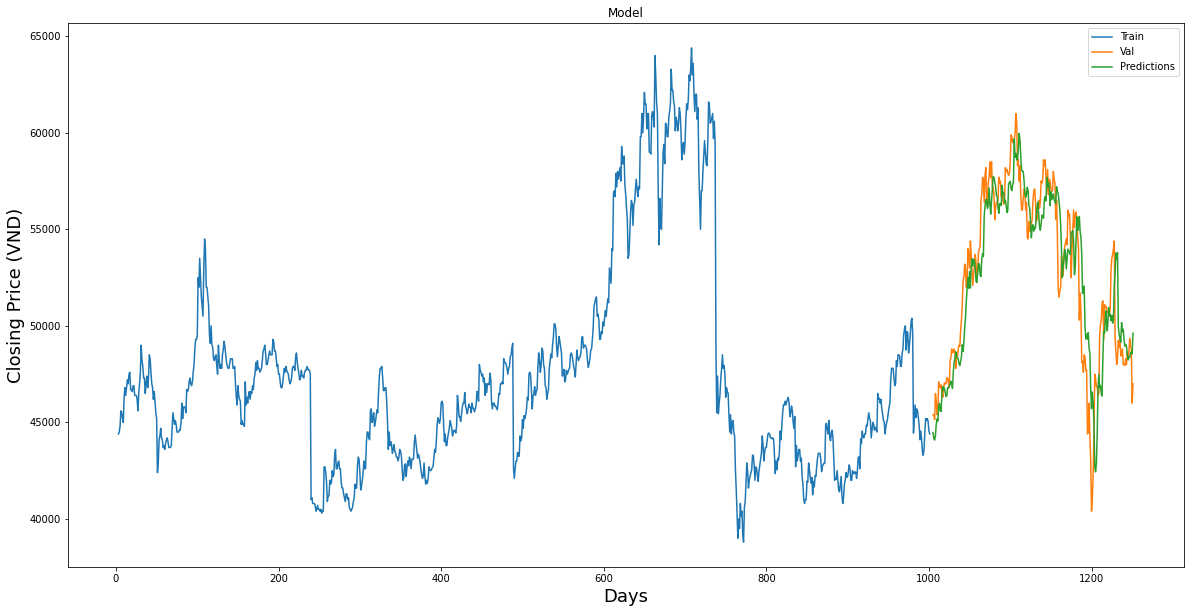

In [ ]:
#Plot/Create the data for the graph
train = a[3:training_data_len]
print(train.size)
valid = a[training_data_len + 3:]
valid['Predictions'] = predictions
print(valid)
# 
plt.figure(figsize=(20,10))
plt.title('Model')
plt.xlabel('Days', fontsize=18)
plt.ylabel('Closing Price (VND)', fontsize=18)
plt.plot(train['CLOSING PRICE'])
plt.plot(valid[['CLOSING PRICE', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
plt.show()